# Question 3

Microsoft called us for help. They built a studio and would like to start producing movies. They're asking what the best films are and how they can make great films. Using provided data, we will give our best recommendations. 

# Can we find writers that show a track record of writing well-rated movies?

In question 4, we will continue with this information for directors. 

### First, let's import the data. 

In [2]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

CONTRIBUTING.md
LICENSE.md
Project Cleaning Rotten Tomatoes Only.ipynb
Project Cleaning.ipynb
Question 1.ipynb
Question 2 .ipynb
Question 3.ipynb
Question 4.ipynb
README.md
awesome.gif
data
project_pdf_submission.gif
repo_pdf.gif
video_recording_submission.gif
zippedData


In [4]:
cd\zippedData

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData


In [5]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData/unzipped


### Let's take a look at the data.

In these dataframes, the tconst values represent unique movie id numbers while the nconst values represent unique crew numbers. 

In [6]:
more_crew = pd.read_csv('imdb.title.principals.csv')
more_crew.head()


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [7]:
crew_df = pd.read_csv('imdb.title.crew.csv')
crew_df.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### We have two dataframes with crew members. 

For now, let's select the data we want to keep. 

In [16]:
film_employees = pd.read_csv('imdb.name.basics.csv')
film_employees = film_employees.loc[:, ['nconst', 'primary_name', 'primary_profession', 'known_for_titles']]

In [17]:
title_ratings = pd.read_csv('imdb.title.ratings.csv')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Now we can shape our titles dataframes to be a key for the tvalues. 

In [18]:
title_info = pd.read_csv('imdb.title.basics.csv')
title_info_small = title_info.loc[:,['tconst', 'original_title']]

In [11]:
title_df = pd.read_csv('imdb.title.akas.csv')

In [12]:
valid_title_df = title_df[title_df['is_original_title'] == 1]

In [13]:
valid_title_only = valid_title_df.loc[:,['title_id','title']]

In [14]:
valid_title_only.replace({'title_id' : 'tconst'}, inplace = True)

In [15]:
valid_title_only.set_index('title_id', inplace = True)

In [20]:
valid_title_only.head()

,title
title_id,
tt0369610,Jurassic World
tt0401729,John Carter
tt10010134,Versailles Rediscovered - The Sun King's Vanis...
tt10027708,Miguelito - Canto a Borinquen
tt10050722,Thing I Don't Get


In [21]:
title_info_small.set_index('tconst', inplace = True)

### Here, we will concatenate them in order to create a master key of tvalues. 

In [22]:
to_concat = [title_info_small, valid_title_only]
t_title = pd.concat(to_concat, sort = True)

### Now, we will replace the empty cells with missing movie titles.

In [24]:
t_title['title_name'] = np.where(t_title['original_title'].isnull(), t_title['title'], t_title['original_title'])

In [25]:
t_title = t_title.loc[:,['title_name']]

In [26]:
t_title.reset_index(inplace = True)

### Let's check for null values and remove them from the data. 

In [29]:
t_title.isna().sum()

index         0
title_name    0
dtype: int64

In [30]:
t_title.dropna(inplace = True)

In [31]:
t_title.set_index('index', inplace = True)

In [32]:
title_ratings.set_index('tconst', inplace = True)

### Now we will add ratings to our title dataframe. 

In [33]:
to_con = [t_title, title_ratings]
title_ratings_votes = pd.concat(to_con, sort = True)

In [34]:
title_ratings_votes.head()

,averagerating,numvotes,title_name
tt0063540,NaN,NaN,Sunghursh
tt0066787,NaN,NaN,Ashad Ka Ek Din
tt0069049,NaN,NaN,The Other Side of the Wind
tt0069204,NaN,NaN,Sabse Bada Sukh
tt0100275,NaN,NaN,La Telenovela Errante


In [35]:
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### In order to evaluate the writers individually, we will split them apart into their own cells. 

In [40]:
split_writers = crew_df['writers'].str.split(',', expand = True)

In [41]:
split_writers['tconst'] = crew_df['tconst']

In [42]:
vertical_writers = split_writers.melt(id_vars = ['tconst'], value_name = 'nconst')

In [43]:
vertical_writers.head()

,tconst,variable,nconst
0,tt0285252,0,nm0899854
1,tt0438973,0,nm0175726
2,tt0462036,0,nm1940585
3,tt0835418,0,nm0310087
4,tt0878654,0,nm0284943


In [44]:
vertical_writers['variable'] = 'writers'

### Now, let's add our other dataframe of crew members to the melted dataframes.

In [50]:
add_crew = more_crew.loc[:, ['tconst','nconst','category']]

In [51]:
add_crew.set_index('tconst', inplace = True)

In [52]:
for_concat = (vertical_directors, vertical_writers)
vertical_crew = pd.concat(for_concat, sort = True)

In [53]:
vertical_crew.set_index('tconst', inplace = True)

In [54]:
vertical_crew.rename(columns = {'variable' : 'category'}, inplace = True)

In [55]:
pls_concat = (vertical_crew, add_crew)
full_crew = pd.concat(pls_concat, sort= True)

### Perfect. It looks like we're getting our nconst values under control. 

In [57]:
full_crew.head()

,category,nconst
tconst,,
tt0285252,0,nm0899854
tt0438973,0,NaN
tt0462036,0,nm1940585
tt0835418,0,nm0151540
tt0878654,0,nm0089502


In [58]:
rating_and_crew = title_ratings_votes.join(full_crew, how = 'inner')

In [59]:
rating_and_crew.drop_duplicates(inplace = True)

In [60]:
rating_and_crew.head()

,averagerating,numvotes,title_name,category,nconst
tt0063540,NaN,NaN,Sunghursh,0,nm0712540
tt0063540,NaN,NaN,Sunghursh,1,None
tt0063540,NaN,NaN,Sunghursh,2,None
tt0063540,NaN,NaN,Sunghursh,3,None
tt0063540,NaN,NaN,Sunghursh,4,None


### Let's get rid of the NaN values from the nconst and average rating columns since we wont be able to evaluate the data without those. 

In [61]:
rating_and_crew.dropna(subset=['averagerating', 'nconst'], inplace = True)

In [62]:
rating_and_crew.head()

,averagerating,numvotes,title_name,category,nconst
tt0063540,7.0,77.0,NaN,0,nm0712540
tt0063540,7.0,77.0,NaN,writers,nm0023551
tt0063540,7.0,77.0,NaN,writers,nm1194313
tt0063540,7.0,77.0,NaN,writers,nm0347899
tt0063540,7.0,77.0,NaN,writers,nm1391276


In [63]:
rating_and_crew.drop_duplicates(inplace = True)

### Now, we're only going to evaluate the records of films that have more than 30 votes. 

In [65]:
rating_and_crew = rating_and_crew[rating_and_crew['numvotes'] >= 30]

### To evaluate the writers, we will separate them now. 

In the data, many crew members have done many jobs but this will help us to see writers who have written multiple films. 

In [67]:
writers_only = rating_and_crew[rating_and_crew['category'] == 'writers']

### We will calculate how many films they have written. 

We are using groupby to create a new series and manipulating it into a dataframe to add it to the dataframe of writers that we created. 

In [68]:
n_count = writers_only.groupby('nconst').nconst.count()

In [69]:
n_count_for_join = n_count.to_frame(name = 'nconst_count')

In [70]:
writers_only.set_index('nconst', inplace = True)

In [71]:
crew_rating_count = writers_only.join(n_count, how = 'inner', lsuffix = 'x')

In [72]:
crew_rating_count.rename(columns = {'nconst': 'ncount'}, inplace = True)

In [73]:
writer_rating_all = crew_rating_count

### Limiting writers by number of films

Let's only evaluate writers with 5 or more movies. 

In [75]:
writer_five = writer_rating_all[writer_rating_all['ncount'] >= 5]

In [76]:
writer_five.head()

,averagerating,numvotes,title_name,category,ncount
nconst,,,,,
nm0000095,6.3,41608.0,NaN,writers,8
nm0000095,7.7,356500.0,NaN,writers,8
nm0000095,6.3,79381.0,NaN,writers,8
nm0000095,7.3,179453.0,NaN,writers,8
nm0000095,6.6,59054.0,NaN,writers,8


In [77]:
writer_five['averagerating'].value_counts()

6.3    396
6.2    386
6.5    385
5.8    366
6.1    362
      ... 
9.3      4
9.1      3
1.4      2
9.4      2
1.5      1
Name: averagerating, Length: 85, dtype: int64

In [78]:
writer_ratings = writer_five.groupby('nconst').averagerating.mean()

In [79]:
writer_ratings

nconst
nm0000095    6.700000
nm0000108    5.905556
nm0000118    6.220000
nm0000175    5.663636
nm0000184    7.140000
               ...   
nm8549650    5.754545
nm8661566    5.991667
nm9130528    5.857143
nm9142341    6.840000
nm9261564    6.440000
Name: averagerating, Length: 1502, dtype: float64

In [80]:
all_writer_ratings = writer_ratings.to_frame()

In [81]:
all_writer_ratings.head()

,averagerating
nconst,
nm0000095,6.700000
nm0000108,5.905556
nm0000118,6.220000
nm0000175,5.663636
nm0000184,7.140000


In [82]:
all_writer_ratings['averagerating'].sort_values( ascending = False)

nconst
nm0517665    8.614286
nm4414980    8.260000
nm0634240    8.160000
nm1503477    8.160000
nm4254419    8.140000
               ...   
nm0689789    2.416667
nm3117093    2.016667
nm2784796    1.363636
nm1448482    1.350000
nm5292466    1.120000
Name: averagerating, Length: 1502, dtype: float64

### Let's also only look at writers who have an average rating of 8.1 or higher. 

In [83]:
best_writers = all_writer_ratings[all_writer_ratings['averagerating'] >= 8.1]

In [84]:
best_writers

,averagerating
nconst,
nm0517665,8.614286
nm0634240,8.160000
nm1503477,8.160000
nm4254419,8.140000
nm4414980,8.260000


### Let's see who these writers are. 

Great! It looks like we have met our final contenders as potential writers to hire. Let's see if we can connect the names to the writers.

In [93]:
film_employees.head()

,primary_name
0,Mary Ellen Bauder
1,Joseph Bauer
2,Bruce Baum
3,Axel Baumann
4,Pete Baxter


In [94]:
film_employees = pd.read_csv('imdb.name.basics.csv')

In [95]:
film_employees.set_index('nconst', inplace = True)

In [96]:
film_employees = film_employees.loc[:,['primary_name']]

In [97]:
writers_for_hire = best_writers.join(film_employees, how = 'inner', lsuffix = 'x')

In [98]:
writers_for_hire.head(10)

,averagerating,primary_name
nconst,,
nm0517665,8.614286,Tom Logan
nm0634240,8.160000,Christopher Nolan
nm1503477,8.160000,Eric Frith
nm4254419,8.140000,Nabwana I.G.G.
nm4414980,8.260000,Aris Chatzistefanou


In [99]:
writers_for_hire.rename(columns={'primary_name': 'Writers', 'averagerating': 'Average Film Rating'}, inplace = True)

### Finally, we can take a look at the top writers.

Text(0.5, 1.0, 'Top Writers with 5+ Films and Average Film Rating Over 8')

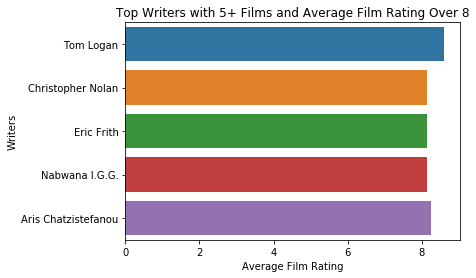

In [101]:
sns.barplot(y = 'Writers', x = 'Average Film Rating', data = writers_for_hire)

plt.title('Top Writers with 5+ Films and Average Film Rating Over 8')

# Conclusion

In conclusion, there are only a few writers who meet the specifications of having written over 5 films and having an average film rating that is higher than 8.1. I would recommend that Microsoft hire one of these writers since they are experienced and competent. 